# Import the correct webdriver

In [ ]:
import pytest
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


@pytest.fixture()
def driver():
    print("Creating Chrome Driver . . .")
    test_driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    yield test_driver
    print("\nChrome Driver is created, exiting the processes. . .\n")
    test_driver.quit()

Previos script is used under `conftest.py` to run the automation in the Chrome browsers. To run the automation in the different browsers we need to adjust the webdriver with the [proper webdriver](https://pypi.org/project/webdriver-manager/) as defined on the documentations. For example, below script is provided to run the code under Edge browsers

In [ ]:
import pytest
from selenium import webdriver
from webdriver_manager.microsoft import EdgeChromiumDriverManager


@pytest.fixture()
def driver():
    print("Creating Chrome Driver . . .")
    # test_driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    test_driver = webdriver.Edge(EdgeChromiumDriverManager().install())
    yield test_driver
    print("\nChrome Driver is created, exiting the processes. . .\n")
    test_driver.quit()

And when we executed the tests, the browsers will be executed on the `Edge` browsers <br>
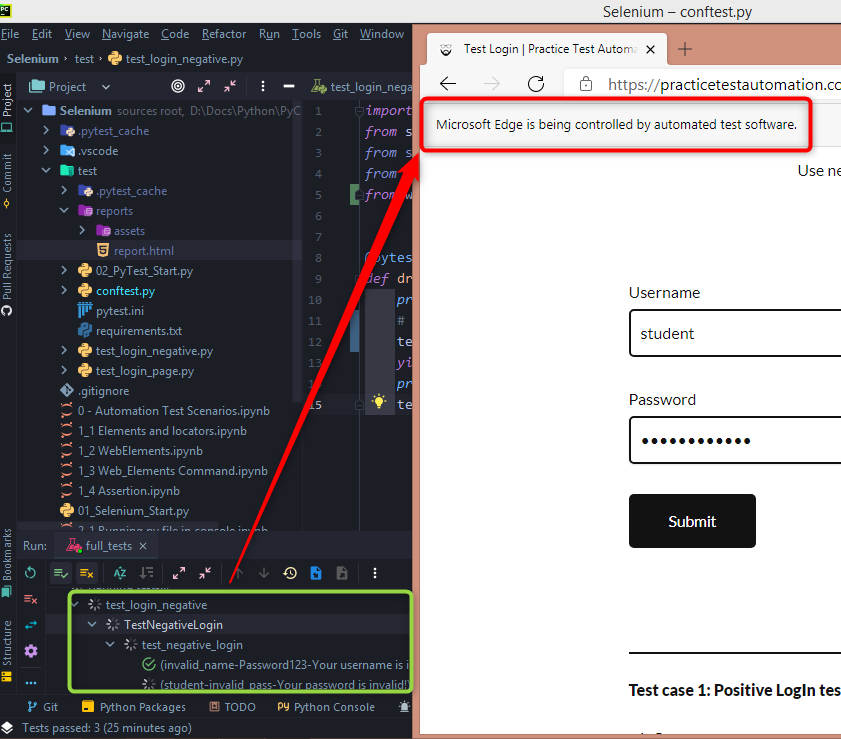

# Custom Command Line to run different browsers

The other ways to run the test on different browsers is, by creating a custom line after importing the neeeded modules. We must adding several options in order to make the automation is working

## Adding `pytest_addoption()` function

`pytest_addoption` is a hook function provided by the Pytest testing framework that allows you to add custom command-line options to the Pytest command-line interface. The function takes a single argument, which is an instance of the `argparse.ArgumentParser` class.

This function is usually defined in a plugin file that has a name starting with ***"conftest."***. This file is located in the root of the project, subdirectory or in the same directory of the test file. When pytest is run *it will automatically discover this file*.

We can use this function to define custom command-line options that can be used to configure your tests or to pass additional information to your test functions. For example, you can use it to define an option to specify a custom configuration file, or to set a flag to indicate that tests should be run in a certain mode.

    Example the pytest framework to run the test on the production environments:

In [ ]:
def pytest_addoption(parser):
    parser.addoption("--env", action="store", default="production",
        help="environment to run the tests against")

def test_something(request):
    env = request.config.getoption("--env")
    if env == "production":
        test.run()
        #run production tests
    else:
        pass
        # run non-production tests


In this case we will add the framework to run the tests on the passed browsers

In [ ]:
def pytest_addoption(parser):
    parser.addoption(
        "--browsers",
        action="store",
        default="chrome",
        help="browsers to run the tests (Chrome/Edge/Opera)",
    )

The option is defined by calling the addoption method of the parser object and passing the following arguments:
- `--browsers`: The name of the option as it will appear on the command-line.
- `action` : The type of action to be taken when this option is encountered on the command-line.
- `store` : it is specified as the action, it tells the ArgumentParser to take the next argument and place it in the namespace under the name specified by the option string.
- `default` : The default value to be used if the option is not specified on the command-line.
- `help` : A brief description of the option and its purpose.

After adding the scripts we also need modify the `driver()` function to receive browsers from added scripts <br>
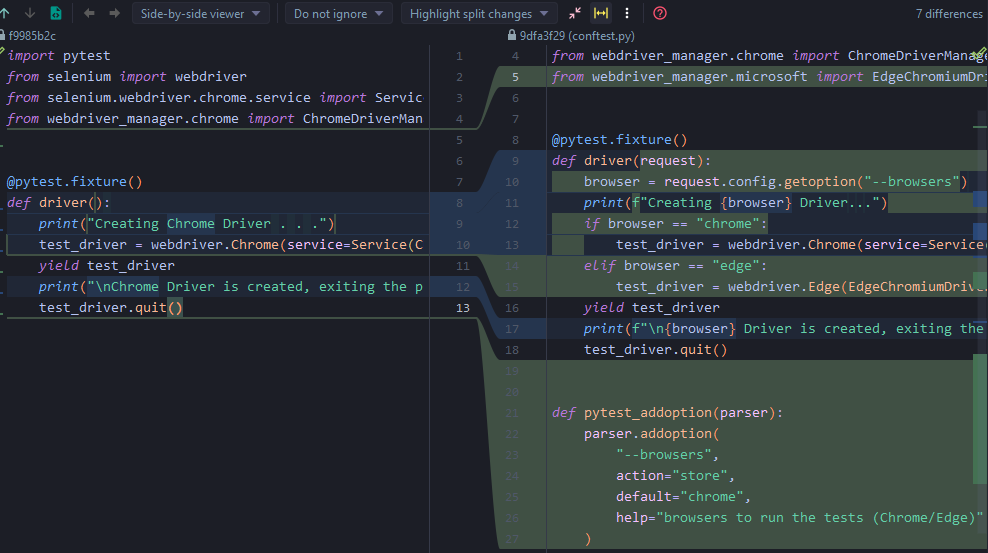

## Adding PyCharm configuration for each browsers

1. Select `Edit Configurations` under run test configuration
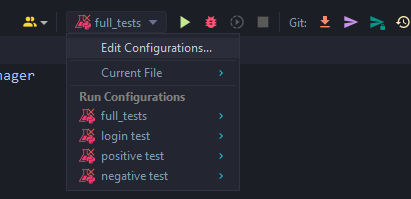
2. Duplicate / create new configurations
3. Modify the name and add `--browsers=browsers_name` parameters on the *Additional Arguments*
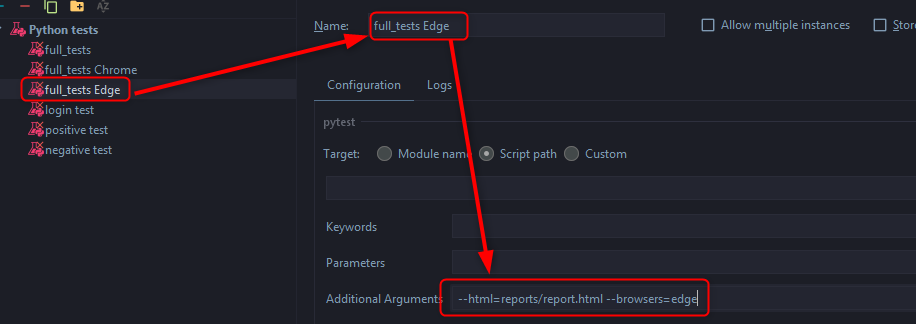
4. Try to run the test on the new configurations <br>
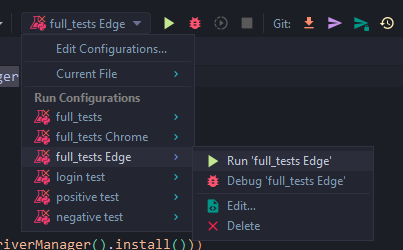

### Test Results:
- Chrome
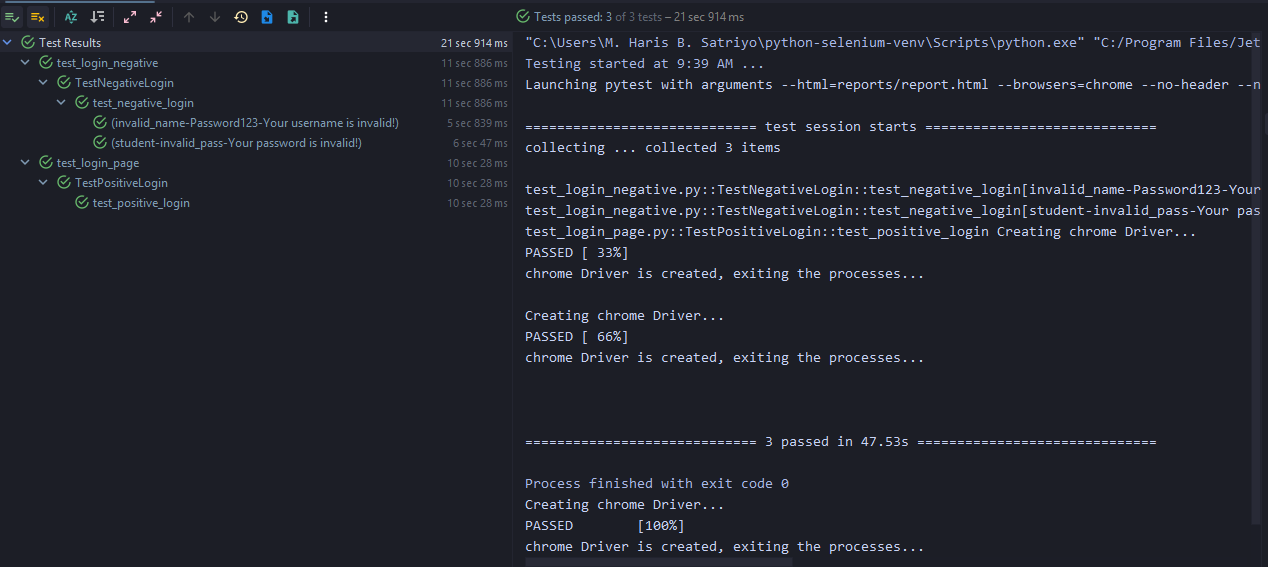
- Edge
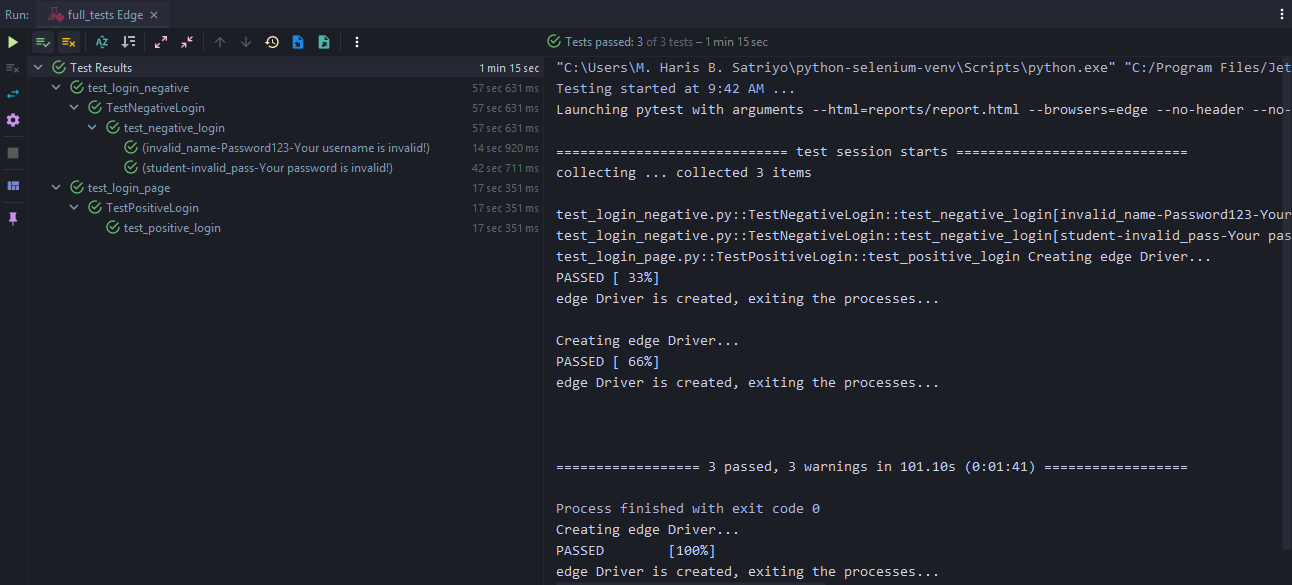

# Run the test in all browsers

To run the tests in all supported browsers, we need these mandatory requirements
1. The browsers must be installed on our machine
2. Webdrivers module are imported properly on each browsers
3. The correct modules are called

### 1. Browsers must installed on our machine

Without installed browsers, this automation will not run and will return this provided `Type error` on the `if` blocks <br>
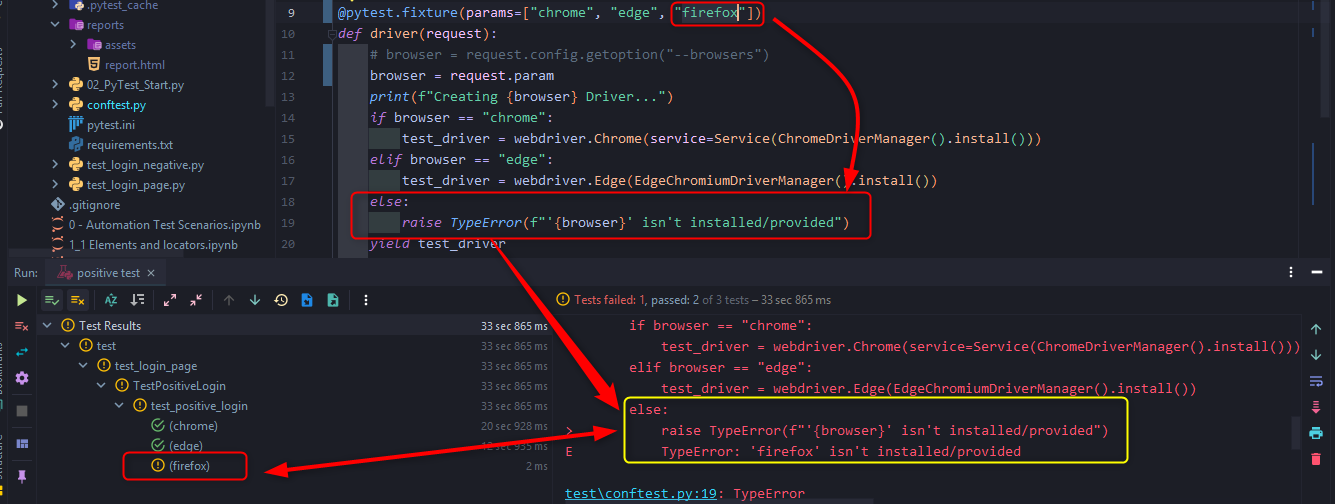

### 2. Webdrivers module are imported properly on each browsers

specific Webdrivers is needed on the URL fetching from the automated test. Without importing the proper modules, we will encountering this error: <br>
`NameError: name 'EdgeChromiumDriverManager' is not defined`

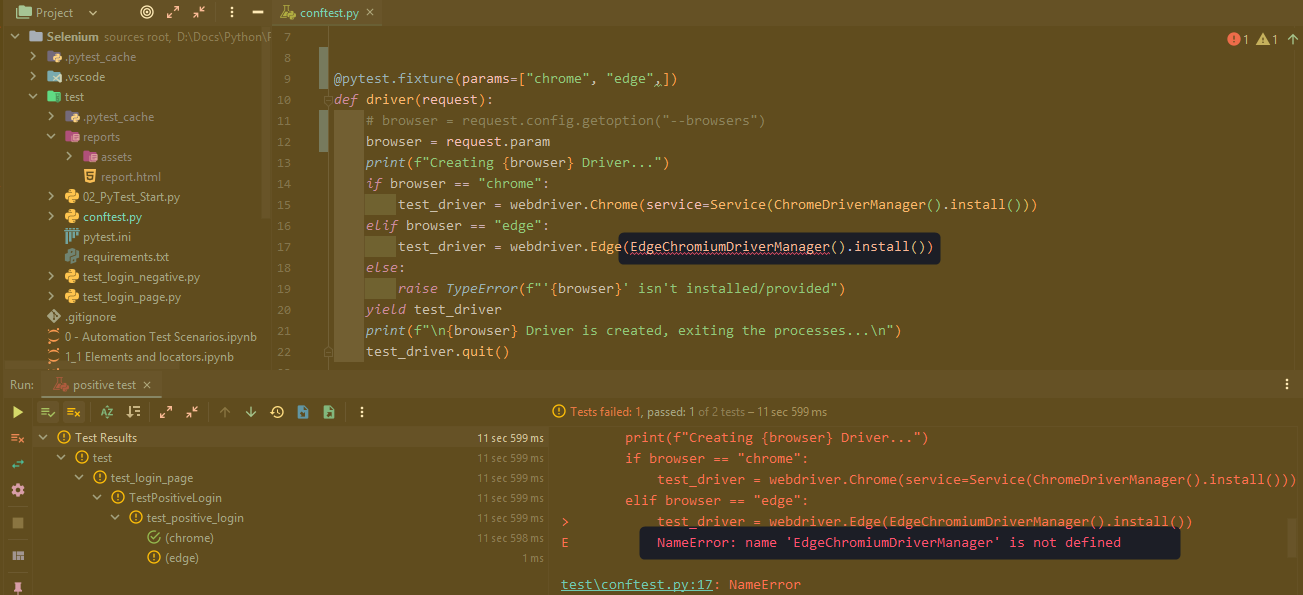

### 3. The correct modules are called

To run the tests in multiple browsers we need to write a different script and passing the browsers on the pytest fixture arguments

In [ ]:
@pytest.fixture(params=["chrome", "edge"])
def driver(request):
    browser = request.param
    print(f"Creating virtual {browser} Driver...")
    if browser == "chrome":
        test_driver = webdriver.Chrome(ChromeDriverManager().install())
    elif browser == "edge":
        test_driver = webdriver.Edge(EdgeChromiumDriverManager().install())
    else:
        raise TypeError(f"'{browser}' isn't installed/provided")
    yield test_driver
    print(f"\n{browser} Driver is created, exiting the processes.\n")
    test_driver.quit()

Explanation:
- `@pytest.fixture(params=["chrome", "edge",])` <br>
The function is decorated with `@pytest.fixture(params=["chrome", "edge"])` which will execute the function multiple times, *once for each value in the list of parameters provided in the params argument* which is `["chrome", "edge",]` in this script.
- `def driver(request):` <br>
The fixture function takes an argument request which is an instance of the `FixtureRequest` class and it is used to access the current parameter value. The `request.param` attribute is used to access the current parameter value, which are chrome and edge.
- `browser = request.param` <br>
 initializing a variable browser to the value of request.param. Then the script checks the value of browser to determine which browser to use, either **Chrome** or **Edge**.
    - `if browser == "chrome":` it instantiate the chrome driver by calling the `webdriver.Chrome` and passing the service parameter with `Service(ChromeDriverManager().install())`. The ChromeDriverManager will install the chrome driver
    - `elif browser == "edge":` it instantiate the edge driver by calling the `webdriver.Edge` and passing the `EdgeChromiumDriverManager().install()` which will install the Edge chromium driver
    - `raise TypeError(f"'{browser}' isn't installed/provided")`: If the browser is not one of the specified value, the script will raise a TypeError with a message indicating that the browser provided is not supported

